# Signal Detection Theory -- part2 (data analysis)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

let's first import the experiment result, and see how it looks like

In [3]:
df = pd.read_csv('sdt_analysis_example.csv')
df.head()

,tgt_sec,SorN,tgt_opacity,response.keys,response.corr,response.rt
0,0.05,0,0.2,down,1,1.638788
1,0.05,1,0.2,up,1,1.554020
2,0.05,0,0.2,down,1,1.170310
3,0.05,0,0.2,down,1,1.437732
4,0.05,0,0.2,down,1,1.103799


In [4]:
#Delete all columns but SorN and resp.corr
df = df[['SorN','response.corr']]

In [5]:
#6. Use the Data->Sort menu function to sort the data as shown 
#6.1.Clicking on the + button will add the “Then by” item
df = df.sort_values(['SorN', 'response.corr'], ascending=[False, False])

Now the dataset looks like this:

In [9]:
df.head()

,SorN,response.corr
1,1,1
10,1,1
11,1,1
14,1,1
22,1,1


##  The value pairs in the columns correspond to the different response types. (1,1) - hit (1,0) - miss (0,1) - correct reject (0,0) - false alarm

In [6]:
# tally the number of responses of each type (don’t forget to calculate the correct rejects and false alarms even though they’re not shown).
df.groupby(['SorN','response.corr']).size()


SorN  response.corr
0     0                11
      1                59
1     0                10
      1                20
dtype: int64

In [7]:
df['class']=''
df['class'].loc[(df['SorN']==1) & (df['response.corr']==1)] = 'hit'
df['class'].loc[(df['SorN']==1) & (df['response.corr']==0)] = 'miss'
df['class'].loc[(df['SorN']==0) & (df['response.corr']==1)] = 'correct reject'
df['class'].loc[(df['SorN']==0) & (df['response.corr']==0)] = 'false alarm'

/Users/amberli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
classes = df.groupby('class').size()
print(classes)


class
correct reject    59
false alarm       11
hit               20
miss              10
dtype: int64


Calculate the probabilities of each response type by dividing the count for the given type by the sum of the counts for the SN or N types, for example...
p(hits) = count(hits)/(count(hits)+count(misses))
p(correct rejects) = count(correct rejects)/(count(correct_rejects)+count(false alarms))

In [9]:
hits = classes['hit']
miss = classes['miss']
corr_rej = classes['correct reject']
fal_alar = classes['false alarm']

In [10]:
p_hit = hits/(hits+miss)
p_corr_rej = corr_rej/(corr_rej+fal_alar)
print(p_hit)
print(p_corr_rej)

0.6666666666666666
0.8428571428571429


In [43]:
## R: qnorm
## python: ppf method of the scipy.stats.norm object. The acronym ppf
#https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p


In [11]:
## R version:
import rpy2.rinterface
%load_ext rpy2.ipython

In [12]:
%%R -i classes
#barplot(classes)
names(classes)
hit <- classes[c('hit')][[1]]
miss <- classes[c('miss')][[1]]
falseAlarm <- classes[c('false alarm')][[1]]
corrReject <- classes[c('correct reject')][[1]]

cat("hit: ", hit)

hit:  20

Practice: Calculate the probabilities of each response type

In [42]:
%%R
## TODO
# Calculate probability of hit 'p.hit': p(hits) = count(hits)/(count(hits)+count(misses))
p.hit <- hit/(hit + miss)

p.miss <- miss/(hit + miss)

## TODO
# Calculate probability of correct reject 'p.cr': p(correct rejects) = count(correct rejects)/(count(correct_rejects)+count(false alarms))
p.cr <- corrReject/(corrReject + falseAlarm)

p.fa <- falseAlarm/(corrReject + falseAlarm)

# Uncomment the following line to see your result
cat('           p(yes)  p(no)\n','present',p.hit, p.miss,'\n absent ',p.cr, p.fa)


           p(yes)  p(no)
 present 0.6666667 0.3333333 
 absent  0.8428571 0.1571429

Practice: calculate Z values for the hits and false alarms

In [43]:
%%R
## TODO (hint: try qnorm function in R)
z.hit <- qnorm(p.hit)
z.fa <- qnorm(p.fa)

## Uncomment the following line to see your result
cat(' z score of hit: ',z.hit, '\n','z score of false alarm: ', z.fa)

 z score of hit:  0.4307273 
 z score of false alarm:  -1.00627

Calculate sensitivity d’ and response criterion C using the following formulas

<center>$d’ = Z(hits) - Z(false alarms)$

<center>$C = -(Z(hits)+Z(false alarms))/2$


In [47]:
%%R
## Todo
d_prime <- z.hit - z.fa
C <- -(z.hit + z.fa)/2

## Uncomment the following line to see your result
cat("d' = ", d_prime,'\nC = ',C)

d' =  1.436997 
C =  0.2877713

### Visualization
Now let's visualized the experimental results

In [102]:
import rpy2.robjects.lib.ggplot2 as ggplot2

R[write to console]: Error in loadNamespace(name) : there is no package called ‘ggplot2’
Calls: <Anonymous> ... tryCatch -> tryCatchList -> tryCatchOne -> <Anonymous>



RRuntimeError: Error in loadNamespace(name) : there is no package called ‘ggplot2’
Calls: <Anonymous> ... tryCatch -> tryCatchList -> tryCatchOne -> <Anonymous>


In [54]:
## Step 1: create data for d' axis
data = np.arange(-4,4,.25)

## step 2:  calculate the curve for the N distribution (z values, mean = 0, sd = 1, false)


In [100]:
%%R -i data

#cat(data_sd, data_mean)

curve_N <- dnorm(data)

#calculate the curve for the SN distribution (z values, mean = d’, sd = 1, false)
curve_SN <- dnorm(data, mean = d_prime)

## create criterion data
x_c <- C + mean(c(d_prime,0))
y_c <- c(0,0.45)

df = data.frame(data,curve_N,curve_SN)  
criterion = data.frame(x_c,y_c)
## plot
#plot(data, curve_N)
#plot(data, curve_SN)



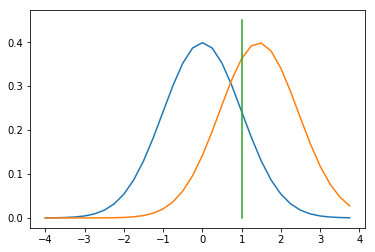

In [109]:
df_plot = %Rget df
df_criterion = %Rget criterion

## plot
plt.plot(df_plot.data, df_plot.curve_N)
plt.plot(df_plot.data, df_plot.curve_SN)
plt.plot(df_criterion.x_c,df_criterion.y_c)